<a href="https://colab.research.google.com/github/vasugupta9/DeepLearningProjects/blob/main/TransferLearningResnet/Transfer_Learning_ResNet_ImageClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Purpose of this notebook is to show an example of training a Deep Neural Network using Transfer Learning
1. Dataset used is Cifar-10 which contains images from 10 different classes  (https://www.cs.toronto.edu/~kriz/cifar.html)
2. Architecture used is ResNet-50 (https://keras.io/api/applications/)


In [5]:
# importing required libraries
import numpy as np 
import cv2
import matplotlib.pyplot as plt 
import tensorflow as tf 
from tensorflow.keras.models import Model 
from tensorflow.keras.layers import Dense , Input
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet import preprocess_input as resnet_preprocess_input


In [6]:
# loading cifar-10 dataset 
(x_train, y_train) , (x_test, y_test) = cifar10.load_data()

# reshaping y_train, y_test to 1D arrays (since later using loss function as sparse categorical crossentropy)
y_train = y_train.reshape(-1)
y_test  = y_test.reshape(-1)

label_names = ['airplane','automobile','bird','cat', 'deer' , 'dog', 'frog', 'horse', 'ship', 'truck' ] # reference - https://www.cs.toronto.edu/~kriz/cifar.html

170500096/170498071 [==============================] - 11s 0us/step


x_train:(50000, 32, 32, 3) , y_train:(50000,) , x_test:(10000, 32, 32, 3) , y_test:(10000,) 
x_train values are in range:0-255
x_test values are in range:0-255
unique values in y_train:[0 1 2 3 4 5 6 7 8 9]
unique values in y_test:[0 1 2 3 4 5 6 7 8 9]


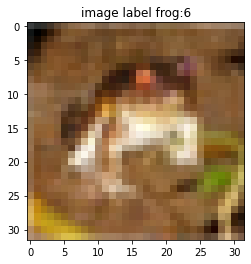

In [7]:
# printing useful dataset related information 

# printing dataset shapes
print("x_train:{} , y_train:{} , x_test:{} , y_test:{} ".format(x_train.shape, y_train.shape, x_test.shape, y_test.shape ))

# printing range of values in x_train, x_test and unique values in y_train, y_test
print("x_train values are in range:{}-{}".format(np.min(x_train), np.max(x_train)))
print("x_test values are in range:{}-{}".format(np.min(x_test), np.max(x_test)))
print("unique values in y_train:{}".format(np.unique(y_train)))
print("unique values in y_test:{}".format(np.unique(y_test)))

# visualizing sample image 
idx = 0
img = x_train[idx]
label_id = y_train[idx]
plt.title( "image label {}:{}".format( label_names[label_id] , label_id ) )
plt.imshow(img)
plt.show()

In [8]:
# pre-processing the image for classification using resnet model (expects a specific kind of input preprocessing for resnet)
x_train_pp = x_train.astype('float32')
x_train_pp = resnet_preprocess_input(x_train_pp)
x_test_pp = x_test.astype('float32')
x_test_pp = resnet_preprocess_input(x_test_pp)

# printing range of values in x_train_pp, x_test_pp
print("x_train_pp values are in range:{} to {}".format(np.min(x_train_pp), np.max(x_train_pp)))
print("x_test_pp values are in range:{} to {}".format(np.min(x_test_pp), np.max(x_test_pp)))

x_train_pp values are in range:-123.68000030517578 to 151.06100463867188
x_test_pp values are in range:-123.68000030517578 to 151.06100463867188


In [9]:
# loading the resnet model 
# 1. top layer (global avg pooling + output dense layer) in not loaded
# 2. weights pre-trained on imagenet are used 
# 3. input image shape is (32,32,3)
# 4. global average pooling is added at the top  
model_resnet = ResNet50(include_top=False, weights='imagenet', input_shape=(32,32,3) , pooling='avg')
model_resnet.summary()

94773248/94765736 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 38, 38, 3)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 16, 16, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 16, 16, 64)   256         conv1_conv[0][0]                 
__________________________

In [10]:
# defining the model for transfer learning with 10 different output classes 
num_classes = 10
model_resnet.trainable = False # freezing the weights in model_resnet (these weights will not be updated during training)
inputs = Input(shape=(32,32,3))
x = model_resnet(inputs, training=False)
outputs = Dense(units=num_classes, activation='softmax')(x)
model = Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
dense (Dense)                (None, 10)                20490     
Total params: 23,608,202
Trainable params: 20,490
Non-trainable params: 23,587,712
_________________________________________________________________


In [11]:
# compiling the model 
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics='accuracy')

In [12]:
# training the model 
H = model.fit(x_train_pp, y_train, validation_split=0.1, epochs=10, verbose=2)

Epoch 1/10
1407/1407 - 69s - loss: 1.5887 - accuracy: 0.5685 - val_loss: 1.3398 - val_accuracy: 0.6276
Epoch 2/10
1407/1407 - 34s - loss: 1.2304 - accuracy: 0.6419 - val_loss: 1.3710 - val_accuracy: 0.6300
Epoch 3/10
1407/1407 - 34s - loss: 1.1648 - accuracy: 0.6585 - val_loss: 1.3614 - val_accuracy: 0.6254
Epoch 4/10
1407/1407 - 34s - loss: 1.1258 - accuracy: 0.6690 - val_loss: 1.4487 - val_accuracy: 0.6216
Epoch 5/10
1407/1407 - 34s - loss: 1.1015 - accuracy: 0.6775 - val_loss: 1.4542 - val_accuracy: 0.6178
Epoch 6/10
1407/1407 - 34s - loss: 1.1143 - accuracy: 0.6785 - val_loss: 1.4831 - val_accuracy: 0.6294
Epoch 7/10
1407/1407 - 34s - loss: 1.0876 - accuracy: 0.6824 - val_loss: 1.4893 - val_accuracy: 0.6412
Epoch 8/10
1407/1407 - 34s - loss: 1.0887 - accuracy: 0.6838 - val_loss: 1.6309 - val_accuracy: 0.6074
Epoch 9/10
1407/1407 - 34s - loss: 1.0838 - accuracy: 0.6880 - val_loss: 1.5115 - val_accuracy: 0.6274
Epoch 10/10
1407/1407 - 34s - loss: 1.0830 - accuracy: 0.6887 - val_loss:

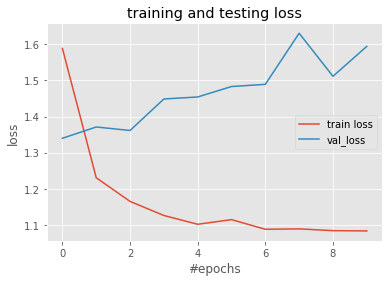

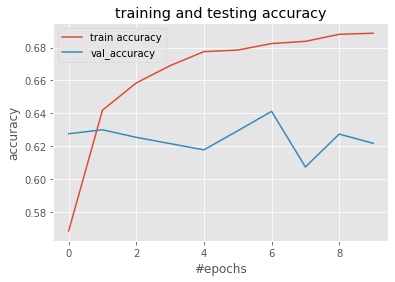

In [16]:
# plotting the training and validation set loss and accuracy results
plt.style.use('ggplot')
plt.figure()
num_epochs=10
epochs = np.arange(num_epochs)
train_loss = H.history['loss']
val_loss   = H.history['val_loss']
plt.plot(epochs, train_loss, label='train loss')
plt.plot(epochs, val_loss, label='val_loss')
plt.title('training and testing loss')
plt.legend()
plt.xlabel('#epochs')
plt.ylabel('loss')

plt.figure()
train_acc = H.history['accuracy']
val_acc   = H.history['val_accuracy']
plt.plot(epochs, train_acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val_accuracy')
plt.title('training and testing accuracy')
plt.legend()
plt.xlabel('#epochs')
plt.ylabel('accuracy')

plt.show()


In [17]:
# evaluating the model on the test set 
model.evaluate(x_test_pp, y_test)

313/313 [==============================] - 8s 26ms/step - loss: 1.6533 - accuracy: 0.6125


[1.653288722038269, 0.612500011920929]